# MNIST Handwritten Digits Dataset

****Table of Contents****:

    - Importing Libraries and Data
    - Data Flattening and Normalization
    - Basic Model
    - Advanced Model
    - CNN Model
    - Conclusions

## Importing Libraries and Data

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, ReLU
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import cv2

In [6]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [7]:
#Dataset info
print(f"Train Set size: {len(X_train)}\nTest Set size: {len(X_test)}\nSample image shape:{X_train[0].shape}")

Train Set size: 60000
Test Set size: 10000
Sample image shape:(28, 28)


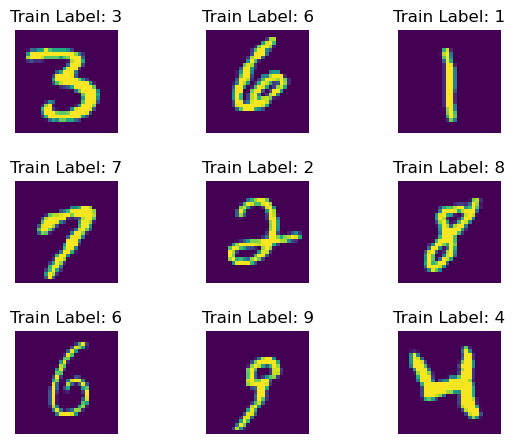

In [4]:
#Image preview
figures = plt.figure()
for i in range (9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[12+i])
    plt.grid(False)
    plt.axis('off')
    plt.title(f"Train Label: {y_train[12+i]}")
plt.tight_layout(pad=2)
plt.savefig("images/SamplePreview.png", bbox_inches="tight")
plt.show()

## Data Flattening and Normalization

In [8]:
#Unrolling and normalizing image data
X_train_flattened = X_train.reshape(len(X_train),28*28) / 255
X_test_flattened = X_test.reshape(len(X_test),28*28) / 255

In [6]:
#Size check
print(f"Flattened Train Set shape: {X_train_flattened.shape}\nFlattened Test Set size: {X_test_flattened.shape}")

Flattened Train Set shape: (60000, 784)
Flattened Test Set size: (10000, 784)


## Basic Model

In [7]:
#Building Basic NN model
model = Sequential([
    Dense(units=10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_flattened, y_train, epochs=5)

c:\Users\jom4n\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8164 - loss: 0.7094
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9136 - loss: 0.3093
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9226 - loss: 0.2817
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9241 - loss: 0.2707
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9267 - loss: 0.2691


In [8]:
y_preds = model.predict(X_test_flattened)
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9140 - loss: 0.3034


[0.27086639404296875, 0.9236000180244446]

In [9]:
#Storing predictions into array using argmax
y_preds = np.array([np.argmax(i) for i in y_preds])

In [10]:
y_preds

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

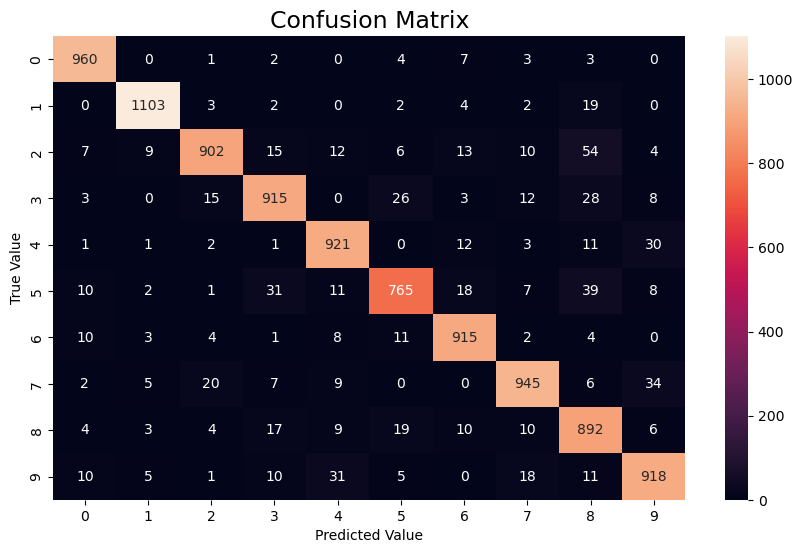

In [11]:
#Confusion Matrix for error analysis
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_preds)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title("Confusion Matrix", fontsize=17)
plt.tight_layout(pad=6)
plt.savefig("images/Conf_Matrix.png", bbox_inches="tight")
plt.show()

In [12]:
#Checking the fraction of missclassifications for each digit
miss_class_list = []
#cm = cm.numpy()
for i in range(10):
    cols_before_sum = np.sum(cm[i,0:i])
    cols_after_sum = np.sum(cm[i,i:])
    miss_class_list.append( (cols_before_sum + cols_after_sum) / cm[i,i] )


In [13]:
miss_class_list = (np.array(miss_class_list) - 1) * 100
miss_class_list

array([ 2.08333333,  2.9011786 , 14.41241685, 10.38251366,  6.62323561,
       16.60130719,  4.69945355,  8.78306878,  9.19282511,  9.91285403])

We see that our NN makes the most mistakes on the digits:
- `2` (13% missclassified)
- `8` (12% missclassified)
- `3` (13% missclassified),

respectively.

## Advanced Model

In [43]:
#Building More Advanced NN model
#print('---------------------------------------------------------\nTRAIN SET:\n---------------------------------------------------------')
model2 = Sequential([
    Flatten(input_shape=(28,28)), #using Flatten layear instead of manually flattening data
    Dense(units=128, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=10, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\Users\jom4n\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
#Configuring Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#Storing history for later plotting
history = model2.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8009 - loss: 2.2886 - val_accuracy: 0.9347 - val_loss: 0.2742
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9334 - loss: 0.2482 - val_accuracy: 0.9460 - val_loss: 0.2119
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9532 - loss: 0.1687 - val_accuracy: 0.9519 - val_loss: 0.1794
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9615 - loss: 0.1355 - val_accuracy: 0.9504 - val_loss: 0.1839
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9679 - loss: 0.1144 - val_accuracy: 0.9534 - val_loss: 0.1999
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9703 - loss: 0.1097 - val_accuracy: 0.9662 - val_loss: 0.1384
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9740 - loss: 0.0909 - val_accuracy: 0.9643 - val_loss: 0.1449
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9786 - loss: 0.0772 - 

In [45]:
#Saving history into a file
with open("files/history_log_1.txt", "wb") as f:
    pickle.dump(history.history, f)

In [46]:
#Convert into dataframe for loss-epoch plots
history = pd.DataFrame(history.history)

<Figure size 1000x700 with 0 Axes>

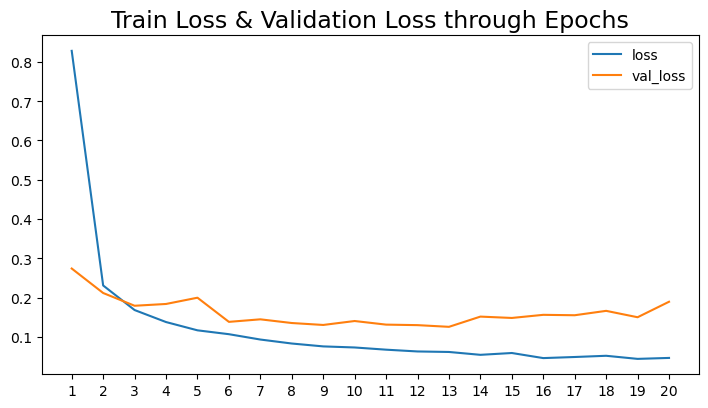

In [47]:
#Plotting Loss through Epochs
fig = plt.figure(figsize=(10,7))
(history[['loss', 'val_loss']]).plot(figsize=(8,5))
plt.title("Train Loss & Validation Loss through Epochs", fontsize=17)
plt.tight_layout(pad=4)
ticks = np.arange(0,20)
plt.xticks(ticks=ticks, labels=[i+1 for i in ticks])
plt.savefig("images/Loss_Val_Loss.png", bbox_inches="tight")
plt.show()

<Figure size 1000x700 with 0 Axes>

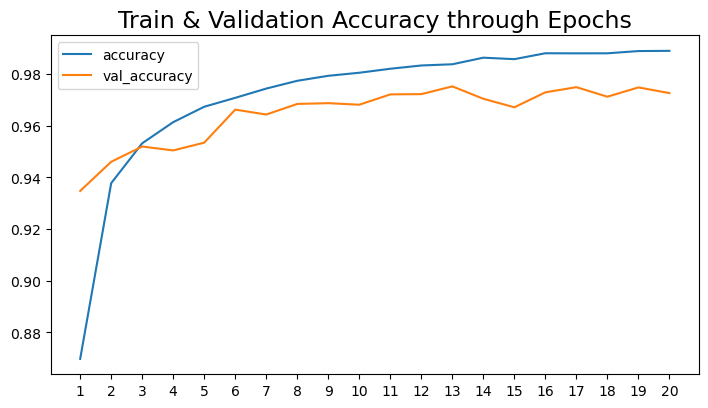

In [48]:
#Plotting Accuracy through Epochs
fig = plt.figure(figsize=(10,7))
(history[['accuracy', 'val_accuracy']]).plot(figsize=(8,5))
plt.title("Train & Validation Accuracy through Epochs", fontsize=17)
plt.tight_layout(pad=4)
ticks = np.arange(0,20)
plt.xticks(ticks=ticks, labels=[i+1 for i in ticks])
plt.savefig("images/Acc_Val_Acc.png", bbox_inches="tight")
plt.show()

We can see that after approximately the 6th epoch, the validation loss is (non-monotonically) rising, while the training loss is falling. This is a textbook case of overfitting. Therefore, for this particular model architecture, we will go with 6 epochs; in fact, the `EarlyStopping`-associated callback has already saved the best performing weights for us.

In [49]:
print('---------------------------------------------------------\nTEST SET:\n---------------------------------------------------------')
y_preds = model2.predict(X_test, verbose=True)
model2.evaluate(X_test, y_test)

---------------------------------------------------------
TEST SET:
---------------------------------------------------------
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9722 - loss: 0.1456


[0.12575602531433105, 0.9751999974250793]

## CNN Model

We attempt the same classification using a simple Convolutional Neural Network Model implemented through Keras' Functional API. For this particular model, the same could be accomplished by using a Sequential Model, but it is a good exercise to use the Funtional API.

The CNN architecture will be as follows:
- Input Layer ($28 \times 28 \times 1$ grayscale image),
<br>
<br>
- Conv2D Layer (64 filters of size $3\times3$), 
- ReLU Layer,
- MaxPool2D Layer (kernel shape of $2\times2$),
<br>
<br>
- Conv2D Layer (64 filters of size $3\times3$), 
- ReLU Layer,
- MaxPool2D Layer (kernel shape of $2\times2$),
<br>
<br>
- Conv2D Layer (64 filters of size $3\times3$), 
- ReLU Layer,
- MaxPool2D Layer (kernel shape of $2\times2$),
<br>
<br>
- Flatten Layer,
- FC Dense Layer (64 units, `relu` activation),
- FC Dense Layer (32 units, `relu` activation),
<br>
<br>
- Dense Output Layer (10 units, `softmax` activation).

In [52]:
#Constructing CNN using Functional API
input_img = tf.keras.Input(shape=(28,28,1))

#1st Convolution Layer
Z1 = Conv2D(filters=64, kernel_size=(3,3))(input_img)
A1 = ReLU()(Z1)
P1 = MaxPool2D(pool_size=(2,2))(A1)

#2nd Convolution Layer
Z2 = Conv2D(filters=64, kernel_size=(3,3))(P1)
A2 = ReLU()(Z2)
P2 = MaxPool2D(pool_size=(2,2))(A2)

#3rd Convolution Layer
Z3 = Conv2D(filters=64, kernel_size=(3,3))(P2)
A3 = ReLU()(Z3)
P3 = MaxPool2D(pool_size=(2,2))(A3)

#Flatten Layer
F = Flatten()(P3)

#1st Fully Connected Layer
D1 = Dense(units=64, activation='relu')(F)

#2nd Fully Connected Layer
D2 = Dense(units=32, activation='relu')(D1)

#Output Layer (softmax dense layer)
outputs = Dense(units=10, activation='softmax')(D2)

model_cnn = tf.keras.Model(inputs=input_img, outputs=outputs)

In [53]:
#Checking model summary
model_cnn.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_7 (ReLU)                  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_8 (ReLU)                  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_9 (ReLU)                  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

It needs to be kept in mind that our output data (`y_train`) contains the integer of the digit that is associated with an image; `y_train` is **not** one-hot encoded! For this reason, we use the 'sparse' version of the `'categorical_crossentropy'` loss function. As a reminder, sparse functions use the target data (ground truth) as **integer labels**: 0, 1, 2, 3, 4, etc., while non-sparse functions use the target data as **one-hot labels**: [1,0,0], [0,1,0], [0,0,1], or similar.

In [55]:
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_cnn = model_cnn.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.9667 - loss: 0.1070 - val_accuracy: 0.9766 - val_loss: 0.0761
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9801 - loss: 0.0665 - val_accuracy: 0.9783 - val_loss: 0.0789
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9850 - loss: 0.0501 - val_accuracy: 0.9790 - val_loss: 0.0773
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9864 - loss: 0.0437 - val_accuracy: 0.9752 - val_loss: 0.0902
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9886 - loss: 0.0376 - val_accuracy: 0.9825 - val_loss: 0.0678
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9907 - loss: 0.0296 - val_accuracy: 0.9821 - val_loss: 0.0630
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9917 - loss: 0.0248 - val_accuracy: 0.9836 - val_loss: 0.0616
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9914 -

In [61]:
#try with 40 epochs and see how it does

In [56]:
#Saving history into a file
with open("files/history_log_CNN.txt", "wb") as f:
    pickle.dump(history_cnn.history, f)

#Convert into dataframe for loss-epoch plots
history_cnn = pd.DataFrame(history_cnn.history)

<Figure size 1000x700 with 0 Axes>

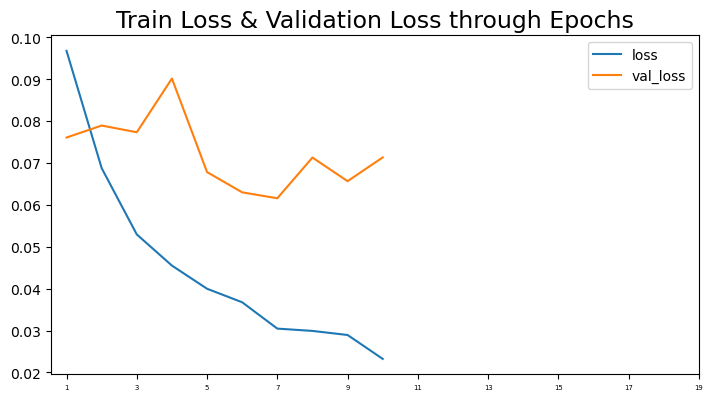

In [58]:
#Plotting loss through different epochs
fig = plt.figure(figsize=(10,7))
(history_cnn[['loss', 'val_loss']]).plot(figsize=(8,5))
plt.title("Train Loss & Validation Loss through Epochs", fontsize=17)
plt.tight_layout(pad=4)
ticks = np.arange(0,20,2)
plt.xticks(ticks=ticks, labels=[i+1 for i in ticks], fontsize=5)
plt.savefig("images/Loss_Val_Loss_CNN.png", bbox_inches="tight")
plt.show()

<Figure size 1000x700 with 0 Axes>

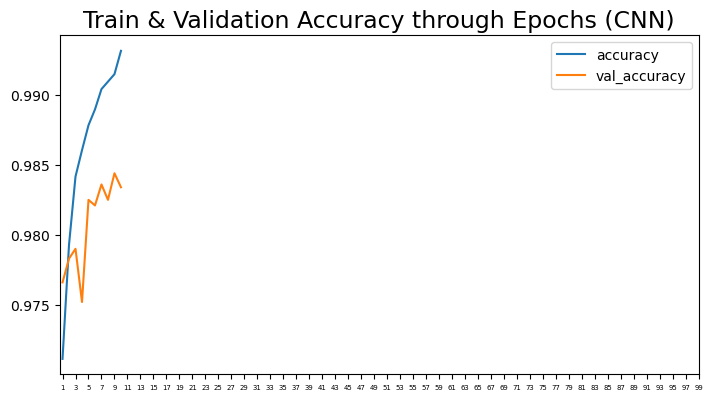

In [59]:
#Plotting accuracy through different epochs
fig = plt.figure(figsize=(10,7))
(history_cnn[['accuracy', 'val_accuracy']]).plot(figsize=(8,5))
plt.title("Train & Validation Accuracy through Epochs (CNN)", fontsize=17)
plt.tight_layout(pad=4)
ticks = np.arange(0,100,2)
plt.xticks(ticks=ticks, labels=[i+1 for i in ticks], fontsize=5)
plt.savefig("images/Acc_Val_Acc_CNN.png", bbox_inches="tight")
plt.show()

In [60]:
print('---------------------------------------------------------\nTEST SET:\n---------------------------------------------------------')
y_preds_cnn = model_cnn.predict(X_test, verbose=True)
model_cnn.evaluate(X_test, y_test)

---------------------------------------------------------
TEST SET:
---------------------------------------------------------
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9801 - loss: 0.0718


[0.06157427281141281, 0.9836000204086304]

In [73]:
# 10 eopchs 0.9836000204086304
#

In [63]:
#Saving model
with open("files/Digit_CNN_model.pickle", 'wb') as f:
    pickle.dump(model_cnn, f)

In [9]:
#Loading model
with open("files/Digit_CNN_model.pickle", 'rb') as f:
    model_cnn_loaded = pickle.load(f)

# Test Run on New Images

### Single Image

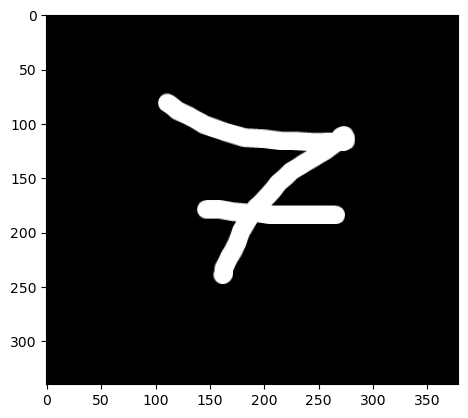

In [59]:
#Loading New Image
img = cv2.imread('test_images/seven.png')
plt.imshow(img)
plt.show()

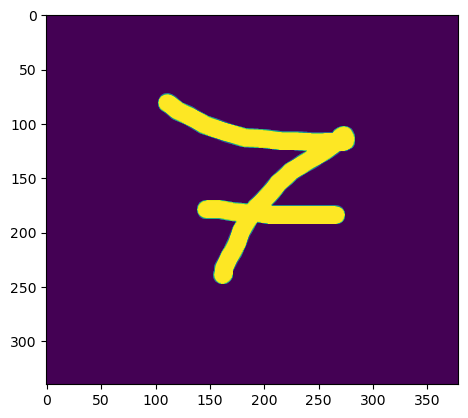

In [60]:
#Converting to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

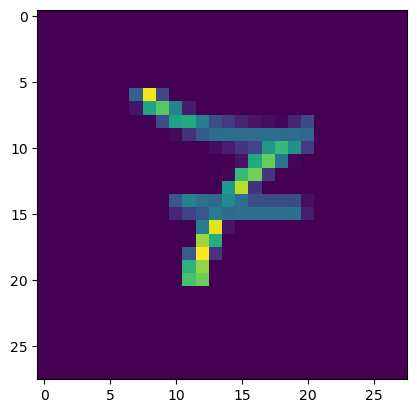

In [64]:
#Resizing and scaling
resized = cv2.resize(gray, (28,28), interpolation=cv2.INTER_AREA)
scaled = tf.keras.utils.normalize(resized, axis=1)
plt.imshow(scaled)
plt.show()

In [68]:
#Reshaping array
img_final = np.array(scaled).reshape(-1, 28, 28, 1)

In [69]:
np.argmax(model_cnn_loaded.predict(img_final))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


1

### All Images

# Conclusions

We have successfully tackled the MNIST Digit Dataset in three different ways using Deep Learning. We have built three Neural Networks:
- a Basic and shallow model that gives 0.926 accuracy on the test set,
- a More Advanced and deeper model that gives 0.975 accuracy on the test set,
- a Convolutional Model that gives 0.969 accuracy on the test set.

The results are satisfactory.